# Step 1: Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D


C:\Users\manshisingh\AppData\Local\Temp\ipykernel_6888\3440943210.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Step 2: Load and Explore the Dataset

In [3]:
data = pd.read_csv("Mall_Customers.csv")
print(data.head())
print(data.info())
print(data.describe())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

*Check for missing values:*

In [4]:
print(data.isnull().sum())


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


# Step 3: Feature Selection

In [5]:
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


# Step 4: Find the Optimal Number of Clusters (Elbow Method)

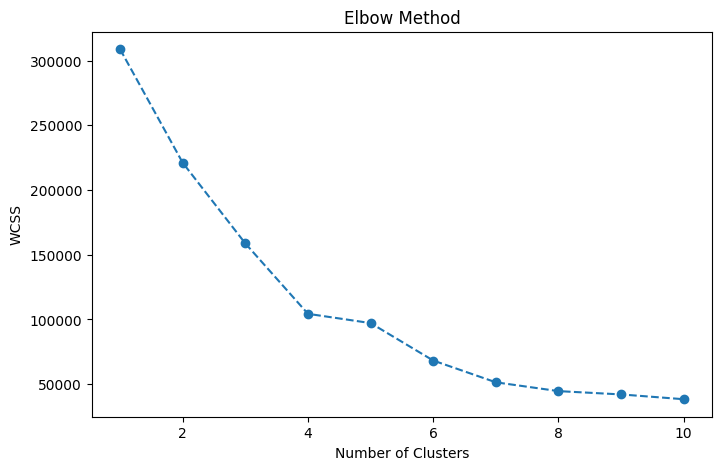

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


# Step 5: Apply K-Means Clustering

In [7]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X)
data['Cluster'] = clusters


# Step 6: 2D Visualization

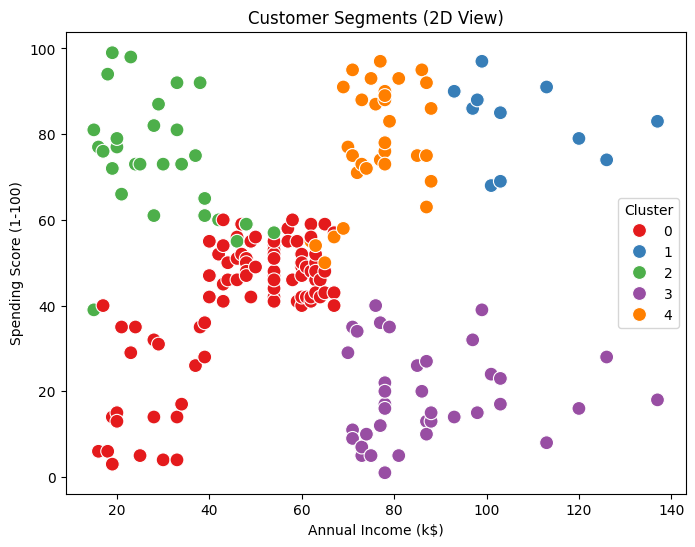

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set1',
    data=data,
    s=100
)
plt.title('Customer Segments (2D View)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


# Step 7: 3D Visualization

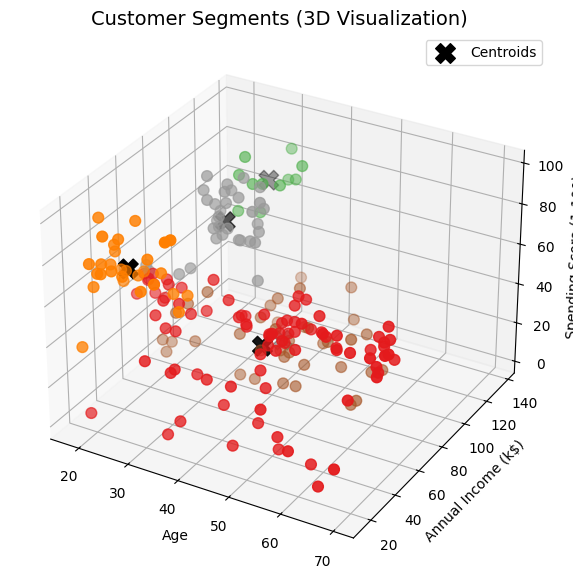

In [9]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    X['Age'], X['Annual Income (k$)'], X['Spending Score (1-100)'],
    c=data['Cluster'], cmap='Set1', s=60
)

centers = kmeans.cluster_centers_
ax.scatter(
    centers[:, 0], centers[:, 1], centers[:, 2],
    s=200, c='black', marker='X', label='Centroids'
)

ax.set_title('Customer Segments (3D Visualization)', fontsize=14)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.legend()
plt.show()


# Step 8: Cluster Centers and Summary

In [10]:
print(pd.DataFrame(kmeans.cluster_centers_, 
                   columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']))

print("\nCluster Summary:")
print(data.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean())


         Age  Annual Income (k$)  Spending Score (1-100)
0  46.213483           47.719101               41.797753
1  32.454545          108.181818               82.727273
2  24.689655           29.586207               73.655172
3  40.394737           87.000000               18.631579
4  31.787879           76.090909               77.757576

Cluster Summary:
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        46.213483           47.719101               41.797753
1        32.454545          108.181818               82.727273
2        24.689655           29.586207               73.655172
3        40.394737           87.000000               18.631579
4        31.787879           76.090909               77.757576


In [12]:
#final DataFrame
data.to_csv('Customer_Segmentation_Results.csv', index=False)

